In [1]:
import json
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

from proj_utils import *

In [2]:
augmented_models_base_dir='/data/ablation/models'
augmented_results_base_dir='/data/ablation/models'

In [3]:
model_dirs=[f.path for f in os.scandir(augmented_models_base_dir) if f.is_dir()]

In [4]:
results=[['model_name', 'test_set_name','f1', 'exact_match']]
for model_dir in model_dirs:
    model_name = model_dir.split("/")[-1:][0]
    model_scores=[f.path for f in os.scandir(model_dir+'/results') if f.path.endswith('_score.json')]
    for model_score_path in model_scores:
        
        with open(model_score_path) as json_file:
            scores = json.load(json_file)
            
        test_set_name = model_score_path.split("/")[-1:][0].replace('_score.json', '')
        results.append([model_name, test_set_name, scores['f1'], scores['exact_match']])


### Add Meta

In [5]:
model_names = ['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQA', 'NaturalQuestions', 'Amazon', 'Reddit', 'NYT', 'New_Wiki']

model_training_sets = [
#     ['model_name', 'SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQA', 'NaturalQuestions'],
    ['model01', True, True, True, True, True, True, False, False, False, False],
    ['model02', True, False, True, True, True, True, False, False, False, False],
    ['model03', False, True, True, True, True, True, False, False, False, False],
    ['model04', True, True, False, True, True, True, False, False, False, False],
    ['model05', True, True, False, False, False, False, False, False, False, False],
    ['model06', False, False, True, True, True, True, False, False, False, False],
    ['model07', True, False, False, False, False, False, False, False, False, False],
    ['model08', False, True, False, False, False, False, False, False, False, False],
    ['model09', False, False, True, False, False, False, False, False, False, False],
    ['model10', False, False, False, True, False, False, False, False, False, False],
    ['model11', False, False, False, False, True, False, False, False, False, False],
    ['model12', False, False, False, False, False, True, False, False, False, False],
    ['model13', True, True, False, True, True, True, False, False, False, False],
    ['model14', True, True, True, False, True, True, False, False, False, False],
    ['model15', True, True, True, True, False, True, False, False, False, False],
    ['model16', True, True, True, True, True, False, False, False, False, False]
]

#Extend column names
results[0].extend(['training_set_count', 'model_trained_sets', 'in_domain'] + model_names)

for result in results:
    for model_training_set in model_training_sets:
        if result[0] == model_training_set[0]:
            training_set_mask = model_training_set[1:]
#             print([i for idx, i in enumerate(model_names) if training_set_mask[idx]])
            model_trained_sets = [i for idx, i in enumerate(model_names) if training_set_mask[idx]]
            
            # training_set_count
            result.append(len(model_trained_sets))
            # model_trained_sets
            result.append(model_trained_sets)
            # in_domain
            result.append(result[1] in model_trained_sets)
            # Training models
            result.extend(model_training_set[1:])


In [6]:
scores_df = pd.DataFrame(results[1:], columns=results[:1][0])
results_parquet_path = augmented_results_base_dir+'/model_scores.parquet.gz'

write_gzip_parquet(scores_df, results_parquet_path)
scores_df.head()

Writting: /data/ablation/models/model_scores.parquet.gz


,model_name,test_set_name,f1,exact_match,training_set_count,model_trained_sets,in_domain,SQuAD,NewsQA,TriviaQA,SearchQA,HotpotQA,NaturalQuestions,Amazon,Reddit,NYT,New_Wiki
0,model08,SearchQA,27.797444,19.623086,1,[NewsQA],False,False,True,False,False,False,False,False,False,False,False
1,model08,NaturalQuestions,55.972728,41.531630,1,[NewsQA],False,False,True,False,False,False,False,False,False,False,False
2,model08,RelationExtraction,68.282165,47.150611,1,[NewsQA],False,False,True,False,False,False,False,False,False,False,False
3,model08,DROP,18.214432,12.175649,1,[NewsQA],False,False,True,False,False,False,False,False,False,False,False
4,model08,NewsQA,61.237606,47.530864,1,[NewsQA],True,False,True,False,False,False,False,False,False,False,False


In [7]:
results[:1]

[['model_name',
  'test_set_name',
  'f1',
  'exact_match',
  'training_set_count',
  'model_trained_sets',
  'in_domain',
  'SQuAD',
  'NewsQA',
  'TriviaQA',
  'SearchQA',
  'HotpotQA',
  'NaturalQuestions',
  'Amazon',
  'Reddit',
  'NYT',
  'New_Wiki']]

In [8]:


results_csv = augmented_results_base_dir+"/model_scores.csv"

with open(results_csv, mode='w') as employee_file:
    csv_writer = csv.writer(employee_file)
    csv_writer.writerows(results)

In [9]:
scores_df = pd.read_csv(results_csv)

scores_df.groupby('model_name')[["f1", "exact_match"]].mean()

,f1,exact_match
model_name,,
model01,68.765107,57.994429
model02,61.296029,50.203685
model03,66.814141,56.007684
model04,67.982584,56.086671
model05,59.724164,48.148188
model06,62.563647,51.701559
model07,54.712629,43.790618
model08,47.414952,34.117467
model09,40.402753,31.502581


In [10]:
scores_df.head(20)

,model_name,test_set_name,f1,exact_match,training_set_count,model_trained_sets,in_domain,SQuAD,NewsQA,TriviaQA,SearchQA,HotpotQA,NaturalQuestions,Amazon,Reddit,NYT,New_Wiki
0,model08,SearchQA,27.797444,19.623086,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False
1,model08,NaturalQuestions,55.972728,41.531630,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False
2,model08,RelationExtraction,68.282165,47.150611,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False
3,model08,DROP,18.214432,12.175649,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False
4,model08,NewsQA,61.237606,47.530864,1,['NewsQA'],True,False,True,False,False,False,False,False,False,False,False
5,model08,TextbookQA,37.078984,26.347305,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False
6,model08,RACE,32.692773,20.474777,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False
7,model08,SQuAD,74.167153,60.902256,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False
8,model08,DuoRC,45.047831,31.512325,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False
9,model08,TriviaQA,49.148536,39.922929,1,['NewsQA'],False,False,True,False,False,False,False,False,False,False,False


In [11]:
scores_df.groupby('test_set_name')[["f1", "exact_match"]].mean()

,f1,exact_match
test_set_name,,
Amazon,62.285162,49.004797
BioASQ,55.450899,40.591755
DROP,28.418856,20.047405
DuoRC,45.485276,36.683877
HotpotQApred,62.665210,46.690180
NYT,75.302193,65.896744
NaturalQuestions,64.243889,51.838579
New_Wiki,74.929978,63.812057
NewsQA,51.696579,38.219670


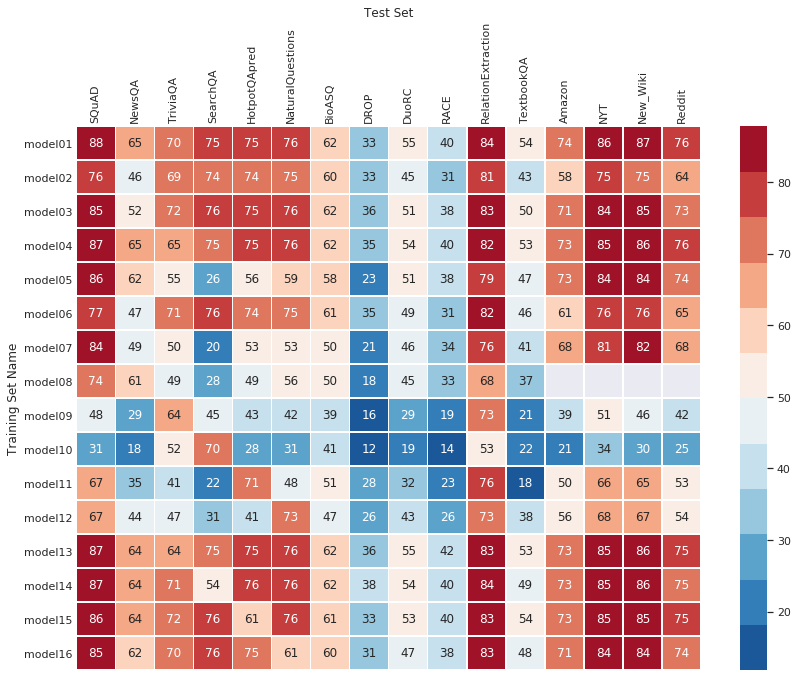

In [12]:
plt.figure(figsize=(14,10))
colormap = sns.color_palette("RdBu_r", 12)
scores = scores_df.pivot("model_name", "test_set_name", "f1")

model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA', 'Amazon', 'NYT', 'New_Wiki', 'Reddit']

ax = sns.heatmap(scores[model_order], annot=True,  linewidths=.5, cmap=colormap)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
# ax.set_yticklabels(['Full - Baseline', 'No SQuAD', 'No NewsQA', 'No TriviaQA', 'Outliers Only', 'No Outliers',
#                    'SQuAD Only', 'NewsQA Only', 'TriviaQA Only', 'SearchQA Only', 'HotpotQA Only', 'Natural Questions Only',
#                    'No TriviaQA', 'No SearchQA', 'No HotpotQA', 'No NaturalQuestions'])
ax.set(xlabel='Test Set', ylabel='Training Set Name')

plt.show()

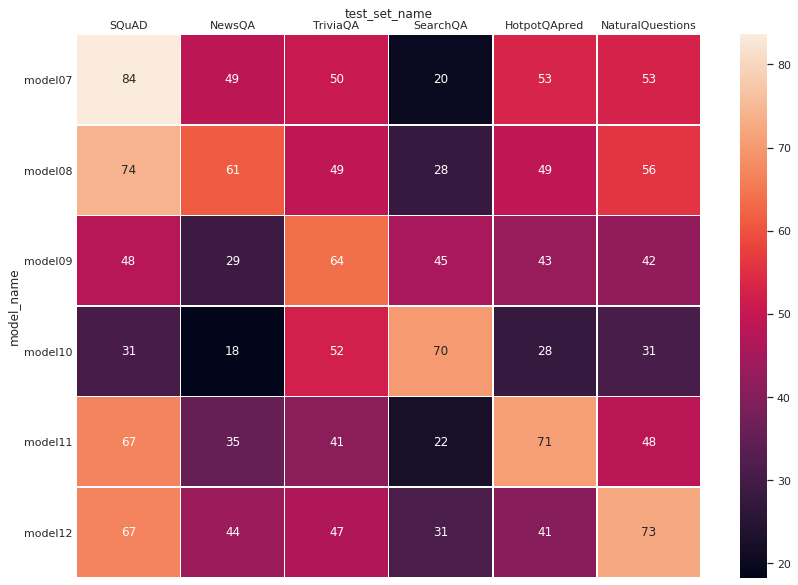

In [13]:
plt.figure(figsize=(14,10))

scores = scores_df.loc[scores_df['model_name'].isin(['model07', 'model08', 'model09', 'model10', 'model11', 'model12'])].pivot("model_name", "test_set_name", "f1")

# model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA']
model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions']

# scores.loc[scores['model_name'] == 'model07']

ax = sns.heatmap(scores[model_order], annot=True,  linewidths=.5)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
plt.show()

In [14]:
scores[['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA']]
scores

test_set_name,Amazon,BioASQ,DROP,DuoRC,HotpotQApred,NYT,NaturalQuestions,New_Wiki,NewsQA,RACE,Reddit,RelationExtraction,SQuAD,SearchQA,TextbookQA,TriviaQA
model_name,,,,,,,,,,,,,,,,
model07,68.123514,50.096482,20.925693,45.994754,53.385259,80.549668,52.883072,82.179464,48.864921,33.852965,67.795448,75.707006,83.628679,20.272167,40.653542,50.489436
model08,NaN,50.208119,18.214432,45.047831,49.131654,NaN,55.972728,NaN,61.237606,32.692773,NaN,68.282165,74.167153,27.797444,37.078984,49.148536
model09,39.269315,38.994190,15.847023,29.370128,43.253154,50.530865,42.149572,45.613398,28.707356,19.177831,42.184893,73.390622,47.775738,45.343074,20.960806,63.876076
model10,20.819185,40.757704,11.881023,19.173460,27.670855,33.682114,30.844100,30.459362,18.259500,14.011482,25.459243,52.734790,30.555759,70.346514,21.773690,52.344409
model11,50.415918,51.445311,28.053060,31.860205,70.815118,65.960280,48.339233,64.660741,35.491924,23.414306,52.718301,75.952068,66.783238,22.464919,18.191682,41.162218
model12,55.631507,46.827969,25.727691,42.940224,40.512202,67.537239,72.554195,67.270937,43.677922,25.875056,53.909902,72.533989,67.008745,31.092040,38.027373,46.735513
